# Linear Regression

### Using Master datafile

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
path = """C:\\Users\\srath\\Old Laptop Backup\\Profile data\\OLD LAPTOP BACKUP\\Assignments\\
Capstone Project\\Hospital_Revised_FlatFiles_20161110\\"""

path = path.replace("\n","")

In [98]:
master_data = pd.read_csv(path + "master_file.csv")

In [99]:
master_data.head()

,Unnamed: 0,Provider ID,MORT_30_AMI_score,MORT_30_CABG_score,MORT_30_COPD_score,MORT_30_HF_score,MORT_30_PN_score,MORT_30_STK_score,PSI_4_SURG_COMP_score,READM_30_AMI_score,...,OP_4_score,PC_01_score,STK_4_score,STK_5_score,STK_6_score,STK_8_score,VTE_1_score,VTE_2_score,VTE_5_score,VTE_6_score
0,0,10001,12.5,4.2,9.3,12.4,15.5,15.4,168.26,16.5,...,NaN,0.0,67.0,98.0,99.0,87.0,97.0,99.0,90.0,0.0
1,1,10005,16.0,NaN,7.6,15.5,20.8,15.5,179.05,16.7,...,99.0,1.0,NaN,99.0,88.0,100.0,95.0,94.0,100.0,NaN
2,2,10006,16.7,4.1,7.1,15.6,18.2,17.9,198.33,16.1,...,NaN,0.0,NaN,99.0,97.0,90.0,98.0,89.0,92.0,0.0
3,3,10007,NaN,NaN,9.3,14.4,18.8,16.6,NaN,NaN,...,89.0,NaN,NaN,100.0,71.0,NaN,97.0,99.0,NaN,NaN
4,4,10008,NaN,NaN,8.2,12.7,15.7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN


In [100]:
master_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [101]:
master_data.columns

Index(['Provider ID', 'MORT_30_AMI_score', 'MORT_30_CABG_score',
       'MORT_30_COPD_score', 'MORT_30_HF_score', 'MORT_30_PN_score',
       'MORT_30_STK_score', 'PSI_4_SURG_COMP_score', 'READM_30_AMI_score',
       'READM_30_CABG_score', 'READM_30_COPD_score', 'READM_30_HF_score',
       'READM_30_HIP_KNEE_score', 'READM_30_HOSP_WIDE_score',
       'READM_30_PN_score', 'READM_30_STK_score', 'HAI_1_SIR', 'HAI_2_SIR',
       'HAI_3_SIR', 'HAI_4_SIR', 'HAI_5_SIR', 'HAI_6_SIR',
       'COMP_HIP_KNEE_score', 'PSI_90_SAFETY_score',
       'H_CLEAN_LINEAR_SCORE_mean', 'H_COMP_1_LINEAR_SCORE_mean',
       'H_COMP_2_LINEAR_SCORE_mean', 'H_COMP_3_LINEAR_SCORE_mean',
       'H_COMP_4_LINEAR_SCORE_mean', 'H_COMP_5_LINEAR_SCORE_mean',
       'H_COMP_6_LINEAR_SCORE_mean', 'H_COMP_7_LINEAR_SCORE_mean',
       'H_HSP_RATING_LINEAR_SCORE_mean', 'H_QUIET_LINEAR_SCORE_mean',
       'H_RECMND_LINEAR_SCORE_mean', 'OP_10', 'OP_11', 'OP_13', 'OP_14',
       'OP_8', 'ED_1b_score', 'ED_2b_score', 'OP_18b_scor

In [102]:
good_columns = round(100 * (master_data.isnull().sum()/len(master_data.index)),2) < 30.00

In [103]:
final_master_df = master_data.loc[:, good_columns]

final_master_df.head()

,Provider ID,MORT_30_COPD_score,MORT_30_HF_score,MORT_30_PN_score,READM_30_COPD_score,READM_30_HF_score,READM_30_HOSP_WIDE_score,READM_30_PN_score,H_CLEAN_LINEAR_SCORE_mean,H_COMP_1_LINEAR_SCORE_mean,...,H_QUIET_LINEAR_SCORE_mean,H_RECMND_LINEAR_SCORE_mean,OP_10,ED_1b_score,ED_2b_score,OP_18b_score,OP_20_score,IMM_2_score,IMM_3_OP_27_FAC_ADHPCT_score,VTE_1_score
0,10001,9.3,12.4,15.5,21.1,21.4,15.4,18.7,84.0,90.0,...,88.0,90.0,6.4,269.0,68.0,196.0,65.0,97.0,81.0,97.0
1,10005,7.6,15.5,20.8,18.0,21.9,14.9,16.4,83.0,91.0,...,86.0,89.0,13.3,243.0,71.0,117.0,27.0,99.0,83.0,95.0
2,10006,7.1,15.6,18.2,19.8,20.6,15.4,17.9,83.0,91.0,...,86.0,84.0,11.8,217.0,78.0,133.0,10.0,100.0,87.0,98.0
3,10007,9.3,14.4,18.8,19.9,21.1,16.6,17.3,89.0,91.0,...,92.0,86.0,24.3,219.0,68.0,119.0,38.0,99.0,53.0,97.0
4,10008,8.2,12.7,15.7,19.2,23.1,15.7,16.0,NaN,NaN,...,NaN,NaN,3.6,180.0,56.0,98.0,27.0,95.0,43.0,99.0


In [104]:
# Imputation of null values to mean value of their columns
final_master_df.MORT_30_COPD_score.fillna(final_master_df.MORT_30_COPD_score.mean(), inplace = True)

final_master_df.MORT_30_HF_score.fillna(final_master_df.MORT_30_HF_score.mean(), inplace = True)

final_master_df.MORT_30_PN_score.fillna(final_master_df.MORT_30_PN_score.mean(), inplace = True)

final_master_df.READM_30_COPD_score.fillna(final_master_df.READM_30_COPD_score.mean(), inplace = True)

final_master_df.READM_30_HF_score.fillna(final_master_df.READM_30_HF_score.mean(), inplace = True)

final_master_df.READM_30_HOSP_WIDE_score.fillna(final_master_df.READM_30_HOSP_WIDE_score.mean(), inplace = True)

final_master_df.READM_30_PN_score.fillna(final_master_df.READM_30_PN_score.mean(), inplace = True)

final_master_df.H_CLEAN_LINEAR_SCORE_mean.fillna(final_master_df.H_CLEAN_LINEAR_SCORE_mean.mean(), inplace = True)

final_master_df.H_COMP_1_LINEAR_SCORE_mean.fillna(final_master_df.H_COMP_1_LINEAR_SCORE_mean.mean(), inplace = True)

final_master_df.H_COMP_2_LINEAR_SCORE_mean.fillna(final_master_df.H_COMP_2_LINEAR_SCORE_mean.mean(), inplace = True)

final_master_df.H_COMP_3_LINEAR_SCORE_mean.fillna(final_master_df.H_COMP_3_LINEAR_SCORE_mean.mean(), inplace = True) 

final_master_df.H_COMP_4_LINEAR_SCORE_mean.fillna(final_master_df.H_COMP_4_LINEAR_SCORE_mean.mean(), inplace = True)

final_master_df.H_COMP_5_LINEAR_SCORE_mean.fillna(final_master_df.H_COMP_5_LINEAR_SCORE_mean.mean(), inplace = True) 

final_master_df.H_COMP_6_LINEAR_SCORE_mean.fillna(final_master_df.H_COMP_6_LINEAR_SCORE_mean.mean(), inplace = True) 

final_master_df.H_COMP_7_LINEAR_SCORE_mean.fillna(final_master_df.H_COMP_7_LINEAR_SCORE_mean.mean(), inplace = True) 

final_master_df.H_HSP_RATING_LINEAR_SCORE_mean.fillna(final_master_df.H_HSP_RATING_LINEAR_SCORE_mean.mean(), inplace = True) 

final_master_df.H_QUIET_LINEAR_SCORE_mean.fillna(final_master_df.H_QUIET_LINEAR_SCORE_mean.mean(), inplace = True)

final_master_df.H_RECMND_LINEAR_SCORE_mean.fillna(final_master_df.H_RECMND_LINEAR_SCORE_mean.mean(), inplace = True)

final_master_df.OP_10.fillna(final_master_df.OP_10.mean(), inplace = True)

final_master_df.ED_1b_score.fillna(final_master_df.ED_1b_score.mean(), inplace = True)

final_master_df.ED_2b_score.fillna(final_master_df.ED_2b_score.mean(), inplace = True)

final_master_df.OP_18b_score.fillna(final_master_df.OP_18b_score.mean(), inplace = True)

final_master_df.OP_20_score.fillna(final_master_df.OP_20_score.mean(), inplace = True)

final_master_df.IMM_2_score.fillna(final_master_df.IMM_2_score.mean(), inplace = True) 

final_master_df.IMM_3_OP_27_FAC_ADHPCT_score.fillna(final_master_df.IMM_3_OP_27_FAC_ADHPCT_score.mean(), inplace = True)

final_master_df.VTE_1_score.fillna(final_master_df.VTE_1_score.mean(), inplace = True)


C:\Users\srath\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [105]:
final_master_df.isnull().sum().max()

0

### Deriving New Features and their transformation

In [106]:
hospital_ratings = pd.read_csv(path + "Hospital General Information.csv", encoding = "ISO-8859-1")

hospital_ratings.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,Above the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Below the National average,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,...,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Not Available,Results are not available for this reporting p...
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,...,Same as the National average,NaN,Not Available,Results are not available for this reporting p...,Same as the National average,NaN,Above the National average,NaN,Not Available,Results are not available for this reporting p...


In [107]:
ratings_df = hospital_ratings[['Provider ID', 'Hospital Type','Hospital Ownership','Hospital overall rating']]

In [108]:
ratings_df.columns = ratings_df.columns.str.replace(' ','_')

In [109]:
ratings_df.Hospital_Ownership.astype('category').value_counts()

Voluntary non-profit - Private                 2027
Proprietary                                     799
Government - Hospital District or Authority     567
Voluntary non-profit - Other                    477
Government - Local                              412
Voluntary non-profit - Church                   349
Government - State                               67
Physician                                        66
Government - Federal                             46
Tribal                                            8
Name: Hospital_Ownership, dtype: int64

In [110]:
def get_owner(x):
    if (x == 'Voluntary non-profit - Private'):
        return 'private_non_profit'
    elif(x == 'Proprietary'):
        return 'private'
    elif(x == 'Government - Hospital District or Authority'):
        return 'government'
    elif(x == 'Voluntary non-profit - Other'):
        return 'private_non_profit'
    elif(x == 'Government - Local'):
        return 'government'
    elif(x == 'Voluntary non-profit - Church'):
         return 'private_non_profit'
    elif(x == 'Government - State'):
         return 'government'
    elif(x == 'Physician'):
         return 'private'
    elif(x == 'Government - Federal'):
         return 'government'
    elif(x == 'Tribal'):
         return 'government'
    else:
         return np.nan

In [111]:
ratings_df['Hospital_Ownership'] = ratings_df['Hospital_Ownership'].apply(get_owner)

C:\Users\srath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [112]:
ratings_df.head()

,Provider_ID,Hospital_Type,Hospital_Ownership,Hospital_overall_rating
0,10001,Acute Care Hospitals,government,3
1,10005,Acute Care Hospitals,government,3
2,10006,Acute Care Hospitals,government,2
3,10007,Acute Care Hospitals,private_non_profit,3
4,10008,Acute Care Hospitals,private,3


In [113]:
ratings_df.Hospital_Type.astype('category').value_counts()

Acute Care Hospitals         3382
Critical Access Hospitals    1337
Childrens                      99
Name: Hospital_Type, dtype: int64

In [114]:
hospital_type_dumm = pd.get_dummies(ratings_df['Hospital_Type'])

hospital_type_dumm.columns = hospital_type_dumm.columns.str.replace(' ','_') 
hospital_type_dumm.head()

,Acute_Care_Hospitals,Childrens,Critical_Access_Hospitals
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [115]:
ratings_df.drop('Hospital_Type', axis= 1, inplace= True)

C:\Users\srath\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [116]:
ratings_df =  pd.concat([ratings_df, hospital_type_dumm], axis = 1)

In [117]:
ownership_dumms = pd.get_dummies(ratings_df['Hospital_Ownership'])

In [118]:
ownership_dumms.head()

,government,private,private_non_profit
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,1,0


In [119]:
ratings_df.drop('Hospital_Ownership', axis= 1, inplace= True)

In [120]:
ratings_df =  pd.concat([ratings_df, ownership_dumms], axis = 1)

In [121]:
ratings_df.head()

,Provider_ID,Hospital_overall_rating,Acute_Care_Hospitals,Childrens,Critical_Access_Hospitals,government,private,private_non_profit
0,10001,3,1,0,0,1,0,0
1,10005,3,1,0,0,1,0,0
2,10006,2,1,0,0,1,0,0
3,10007,3,1,0,0,0,0,1
4,10008,3,1,0,0,0,1,0


In [122]:
ratings_df.isnull().sum().max()

0

In [123]:
ratings_df.Hospital_overall_rating.astype('category').value_counts()

3                1772
Not Available    1170
4                 964
2                 684
1                 117
5                 111
Name: Hospital_overall_rating, dtype: int64

In [124]:
ratings_df =  ratings_df[ratings_df.Hospital_overall_rating != 'Not Available']

In [125]:
ratings_df.shape

(3648, 8)

### Adding the new features to the existing dataset

In [126]:
final_master_df.columns = final_master_df.columns.str.replace(' ','_')

In [127]:
final_master_df.shape

(4818, 27)

In [128]:
final_master_df =  final_master_df.merge(ratings_df, on = "Provider_ID", how = "inner")

In [130]:
final_master_df.shape

(3648, 34)

### Train Test Split

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
# defining x and y datasets


x = final_master_df.drop(['Provider_ID', 'Hospital_overall_rating'], axis= 1)

y = final_master_df['Hospital_overall_rating']

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [143]:
x_train.head()

,MORT_30_COPD_score,MORT_30_HF_score,MORT_30_PN_score,READM_30_COPD_score,READM_30_HF_score,READM_30_HOSP_WIDE_score,READM_30_PN_score,H_CLEAN_LINEAR_SCORE_mean,H_COMP_1_LINEAR_SCORE_mean,H_COMP_2_LINEAR_SCORE_mean,...,OP_20_score,IMM_2_score,IMM_3_OP_27_FAC_ADHPCT_score,VTE_1_score,Acute_Care_Hospitals,Childrens,Critical_Access_Hospitals,government,private,private_non_profit
3154,7.200000,12.400000,14.1,19.70000,22.000000,14.8,15.2,87.29333,91.327537,91.899373,...,25.0,71.0,66.0,90.0,1,0,0,1,0,0
3076,8.082818,12.158015,15.8,19.99926,21.954575,15.0,16.5,86.00000,93.000000,95.000000,...,37.0,94.0,79.0,100.0,1,0,0,0,1,0
3385,8.400000,14.200000,16.1,20.40000,23.200000,15.4,16.9,88.00000,90.000000,90.000000,...,34.0,93.0,73.0,90.0,1,0,0,0,1,0
3034,10.700000,12.600000,17.8,20.80000,20.100000,14.9,18.1,87.00000,90.000000,92.000000,...,30.0,84.0,80.0,86.0,1,0,0,1,0,0
104,8.500000,13.300000,16.9,20.30000,22.200000,14.7,15.7,85.00000,88.000000,90.000000,...,44.0,95.0,69.0,97.0,1,0,0,0,1,0


In [144]:
allcols = list(x_train.columns)
catvars = ['Acute_Care_Hospitals', 'Childrens', 'Critical_Access_Hospitals',
       'government', 'private', 'private_non_profit']

numvars = [x for x in allcols if x not in catvars]

print(numvars)

['MORT_30_COPD_score', 'MORT_30_HF_score', 'MORT_30_PN_score', 'READM_30_COPD_score', 'READM_30_HF_score', 'READM_30_HOSP_WIDE_score', 'READM_30_PN_score', 'H_CLEAN_LINEAR_SCORE_mean', 'H_COMP_1_LINEAR_SCORE_mean', 'H_COMP_2_LINEAR_SCORE_mean', 'H_COMP_3_LINEAR_SCORE_mean', 'H_COMP_4_LINEAR_SCORE_mean', 'H_COMP_5_LINEAR_SCORE_mean', 'H_COMP_6_LINEAR_SCORE_mean', 'H_COMP_7_LINEAR_SCORE_mean', 'H_HSP_RATING_LINEAR_SCORE_mean', 'H_QUIET_LINEAR_SCORE_mean', 'H_RECMND_LINEAR_SCORE_mean', 'OP_10', 'ED_1b_score', 'ED_2b_score', 'OP_18b_score', 'OP_20_score', 'IMM_2_score', 'IMM_3_OP_27_FAC_ADHPCT_score', 'VTE_1_score']


In [145]:
x_test.shape

(1095, 32)

In [146]:
y_train.head()

3154    4
3076    4
3385    2
3034    2
104     3
Name: Hospital_overall_rating, dtype: object

### Feature Scaling using Standard Scaling method

In [147]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [148]:
x_train[numvars] = scaler.fit_transform(x_train[numvars])

C:\Users\srath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\srath\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [149]:
x_test[numvars] = scaler.transform(x_test[numvars])

C:\Users\srath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\srath\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


## Transforming to Normal distribution using quantile tranformer

In [135]:
from sklearn.preprocessing import QuantileTransformer

In [136]:
qnt = QuantileTransformer(output_distribution='normal')

In [150]:
x_train[numvars] = qnt.fit_transform(x_train[numvars])
x_test[numvars] = qnt.fit_transform(x_test[numvars])

C:\Users\srath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\srath\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\srath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [151]:
x_train.head()

,MORT_30_COPD_score,MORT_30_HF_score,MORT_30_PN_score,READM_30_COPD_score,READM_30_HF_score,READM_30_HOSP_WIDE_score,READM_30_PN_score,H_CLEAN_LINEAR_SCORE_mean,H_COMP_1_LINEAR_SCORE_mean,H_COMP_2_LINEAR_SCORE_mean,...,OP_20_score,IMM_2_score,IMM_3_OP_27_FAC_ADHPCT_score,VTE_1_score,Acute_Care_Hospitals,Childrens,Critical_Access_Hospitals,government,private,private_non_profit
3154,-0.916587,0.293986,-1.104747,-0.270485,0.186756,-1.007252,-1.456896,0.027604,-0.013801,-0.198258,...,-0.018820,-1.934489,-1.280981,-1.046576,1,0,0,1,0,0
3076,0.086674,0.041413,-0.252311,-0.046436,0.072829,-0.728240,-0.412900,-0.439001,0.791884,1.381364,...,0.926176,-0.378977,-0.639462,5.199338,1,0,0,0,1,0
3385,0.480839,1.464186,-0.115678,0.486480,0.922330,-0.163824,-0.127052,0.209146,-0.749670,-0.924252,...,0.785036,-0.448692,-0.943656,-1.046576,1,0,0,0,1,0
3034,1.959536,0.426601,0.774833,0.766391,-1.387908,-0.858910,0.778225,-0.195700,-0.749670,0.129582,...,0.574595,-1.421556,-0.592444,-1.384628,1,0,0,1,0,0
104,0.573115,0.875354,0.341493,0.394525,0.317650,-1.114032,-1.029375,-0.675277,-1.411293,-0.924252,...,1.233962,-0.238089,-1.140077,0.135911,1,0,0,0,1,0


In [152]:
x_test.head()

,MORT_30_COPD_score,MORT_30_HF_score,MORT_30_PN_score,READM_30_COPD_score,READM_30_HF_score,READM_30_HOSP_WIDE_score,READM_30_PN_score,H_CLEAN_LINEAR_SCORE_mean,H_COMP_1_LINEAR_SCORE_mean,H_COMP_2_LINEAR_SCORE_mean,...,OP_20_score,IMM_2_score,IMM_3_OP_27_FAC_ADHPCT_score,VTE_1_score,Acute_Care_Hospitals,Childrens,Critical_Access_Hospitals,government,private,private_non_profit
1950,0.055229,0.033880,0.457033,0.010037,0.048948,-0.152391,-1.186981,0.080379,0.021329,-0.158740,...,-0.266584,-0.613509,-0.307111,-0.611996,0,0,1,0,0,1
423,0.055229,0.033880,-0.406079,0.010037,0.048948,-1.018778,-0.003764,0.519225,-0.263985,0.571638,...,0.182290,0.830234,-0.147316,0.421111,1,0,0,0,0,1
3047,0.296607,0.977487,0.161281,-0.759677,-0.656486,-0.877196,-1.186981,-0.631785,0.333524,0.571638,...,1.053106,-0.035135,-1.295363,-1.411293,1,0,0,1,0,0
2412,0.583496,-0.631785,-0.018820,-0.170185,0.261387,0.369558,-1.017725,0.749670,-0.642543,-0.860725,...,-0.175278,-0.858910,0.756333,-1.490335,1,0,0,0,0,1
2975,1.505747,1.716415,1.876881,0.781626,0.318969,-0.593940,-0.003764,-1.097845,-1.025123,0.571638,...,0.726606,-0.388430,-0.868016,-1.286702,1,0,0,0,1,0


### Model Building: Linear Regression with all the features

In [153]:
import statsmodels.api as sm

In [154]:
x_train_all = sm.add_constant(x_train)

In [155]:
lr_model_1 = sm.OLS(y_train.astype('float'), x_train_all).fit()

In [156]:
lr_model_1.params

const                             1.675114e+00
MORT_30_COPD_score               -8.123469e-02
MORT_30_HF_score                 -1.212847e-01
MORT_30_PN_score                 -1.431714e-01
READM_30_COPD_score              -2.376980e-02
READM_30_HF_score                -1.879801e-02
READM_30_HOSP_WIDE_score         -3.431105e-01
READM_30_PN_score                -2.285635e-02
H_CLEAN_LINEAR_SCORE_mean         4.383931e-02
H_COMP_1_LINEAR_SCORE_mean        6.012517e-02
H_COMP_2_LINEAR_SCORE_mean       -1.426140e-02
H_COMP_3_LINEAR_SCORE_mean        1.045171e-01
H_COMP_4_LINEAR_SCORE_mean        5.930645e-02
H_COMP_5_LINEAR_SCORE_mean        3.809337e-02
H_COMP_6_LINEAR_SCORE_mean        1.522417e-02
H_COMP_7_LINEAR_SCORE_mean        8.050673e-02
H_HSP_RATING_LINEAR_SCORE_mean    8.443492e-02
H_QUIET_LINEAR_SCORE_mean         1.720184e-02
H_RECMND_LINEAR_SCORE_mean        4.286724e-03
OP_10                            -3.047805e-02
ED_1b_score                      -5.413344e-02
ED_2b_score  

In [157]:
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Hospital_overall_rating   R-squared:                       0.730
Model:                                 OLS   Adj. R-squared:                  0.727
Method:                      Least Squares   F-statistic:                     235.5
Date:                     Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                             22:37:51   Log-Likelihood:                -1489.6
No. Observations:                     2553   AIC:                             3039.
Df Residuals:                         2523   BIC:                             3215.
Df Model:                               29                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              1.6751      0.008    220.741      0.000       1.660       1.690
MORT_30_COPD_score                -0.0812      0.010     -8.354      0.000      -0.100      -0.062
MORT_30_HF_score                  -0.1213      0.010    -11.957      0.000      -0.141      -0.101
MORT_30_PN_score                  -0.1432      0.010    -14.369      0.000      -0.163      -0.124
READM_30_COPD_score               -0.0238      0.010     -2.368      0.018      -0.043      -0.004
READM_30_HF_score                 -0.0188      0.011     -1.749      0.080      -0.040       0.002
READM_30_HOSP_WIDE_score          -0.3431      0.012    -27.769      0.000      -0.367      -0.319
READM_30_PN_score                 -0.0229      0.011     -2.120      0.034      -0.044      -0.002
H_CLEAN_LINEAR_SCORE_mean          0.0438      0.013      3.357      0.001       0.018       0.069
H_COMP_1_LINEAR_SCORE_mean         0.0601      0.023      2.569      0.010       0.014       0.106
H_COMP_2_LINEAR_SCORE_mean        -0.0143      0.015     -0.944      0.345      -0.044       0.015
H_COMP_3_LINEAR_SCORE_mean         0.1045      0.019      5.468      0.000       0.067       0.142
H_COMP_4_LINEAR_SCORE_mean         0.0593      0.017      3.456      0.001       0.026       0.093
H_COMP_5_LINEAR_SCORE_mean         0.0381      0.016      2.431      0.015       0.007       0.069
H_COMP_6_LINEAR_SCORE_mean         0.0152      0.013      1.215      0.225      -0.009       0.040
H_COMP_7_LINEAR_SCORE_mean         0.0805      0.019      4.133      0.000       0.042       0.119
H_HSP_RATING_LINEAR_SCORE_mean     0.0844      0.030      2.775      0.006       0.025       0.144
H_QUIET_LINEAR_SCORE_mean          0.0172      0.013      1.319      0.187      -0.008       0.043
H_RECMND_LINEAR_SCORE_mean         0.0043      0.025      0.170      0.865      -0.045       0.054
OP_10                             -0.0305      0.008     -3.792      0.000      -0.046      -0.015
ED_1b_score                       -0.0541      0.020     -2.726      0.006      -0.093      -0.015
ED_2b_score                        0.0147      0.017      0.843      0.399      -0.020       0.049
OP_18b_score                      -0.0054      0.013     -0.409      0.682      -0.031       0.021
OP_20_score                       -0.0148      0.010     -1.425      0.154      -0.035       0.006
IMM_2_score                        0.0178      0.005      3.586      0.000       0.008       0.027
IMM_3_OP_27_FAC_ADHPCT_score       0.0043      0.007      0.571      0.568      -0.010       0.019
VTE_1_score                        0.0171      0.005      3.491      0.000       0.008       0.027
Acute_Care_Hospitals               0.8357      0.011     7

### Feature Selection using RFE

In [158]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [159]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [160]:
rfe = RFE(lm, 15)
rfe = rfe.fit(x_train, y_train)

In [161]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('MORT_30_COPD_score', True, 1),
 ('MORT_30_HF_score', True, 1),
 ('MORT_30_PN_score', True, 1),
 ('READM_30_COPD_score', False, 3),
 ('READM_30_HF_score', False, 4),
 ('READM_30_HOSP_WIDE_score', True, 1),
 ('READM_30_PN_score', True, 1),
 ('H_CLEAN_LINEAR_SCORE_mean', True, 1),
 ('H_COMP_1_LINEAR_SCORE_mean', True, 1),
 ('H_COMP_2_LINEAR_SCORE_mean', False, 10),
 ('H_COMP_3_LINEAR_SCORE_mean', True, 1),
 ('H_COMP_4_LINEAR_SCORE_mean', True, 1),
 ('H_COMP_5_LINEAR_SCORE_mean', True, 1),
 ('H_COMP_6_LINEAR_SCORE_mean', False, 9),
 ('H_COMP_7_LINEAR_SCORE_mean', True, 1),
 ('H_HSP_RATING_LINEAR_SCORE_mean', True, 1),
 ('H_QUIET_LINEAR_SCORE_mean', False, 8),
 ('H_RECMND_LINEAR_SCORE_mean', False, 15),
 ('OP_10', True, 1),
 ('ED_1b_score', True, 1),
 ('ED_2b_score', False, 7),
 ('OP_18b_score', False, 13),
 ('OP_20_score', False, 6),
 ('IMM_2_score', False, 5),
 ('IMM_3_OP_27_FAC_ADHPCT_score', False, 14),
 ('VTE_1_score', False, 2),
 ('Acute_Care_Hospitals', False, 16),
 ('Childrens', 

In [162]:
main_cols = x_train.columns[rfe.support_]
main_cols

Index(['MORT_30_COPD_score', 'MORT_30_HF_score', 'MORT_30_PN_score',
       'READM_30_HOSP_WIDE_score', 'READM_30_PN_score',
       'H_CLEAN_LINEAR_SCORE_mean', 'H_COMP_1_LINEAR_SCORE_mean',
       'H_COMP_3_LINEAR_SCORE_mean', 'H_COMP_4_LINEAR_SCORE_mean',
       'H_COMP_5_LINEAR_SCORE_mean', 'H_COMP_7_LINEAR_SCORE_mean',
       'H_HSP_RATING_LINEAR_SCORE_mean', 'OP_10', 'ED_1b_score', 'government'],
      dtype='object')

### Build Linear Regression model with RFE features

In [163]:
import statsmodels.api as sm

In [164]:
rfe_x_train = x_train[main_cols]

x_train_all = sm.add_constant(rfe_x_train)

In [165]:
lr_model_1 = sm.OLS(y_train.astype('float'), x_train_all).fit()

In [166]:
lr_model_1.params

const                             3.106529
MORT_30_COPD_score               -0.082799
MORT_30_HF_score                 -0.124542
MORT_30_PN_score                 -0.139310
READM_30_HOSP_WIDE_score         -0.361969
READM_30_PN_score                -0.027527
H_CLEAN_LINEAR_SCORE_mean         0.039005
H_COMP_1_LINEAR_SCORE_mean        0.049943
H_COMP_3_LINEAR_SCORE_mean        0.103440
H_COMP_4_LINEAR_SCORE_mean        0.060625
H_COMP_5_LINEAR_SCORE_mean        0.048086
H_COMP_7_LINEAR_SCORE_mean        0.080997
H_HSP_RATING_LINEAR_SCORE_mean    0.105720
OP_10                            -0.033125
ED_1b_score                      -0.060128
government                       -0.077865
dtype: float64

In [167]:
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Hospital_overall_rating   R-squared:                       0.722
Model:                                 OLS   Adj. R-squared:                  0.721
Method:                      Least Squares   F-statistic:                     439.8
Date:                     Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                             22:38:14   Log-Likelihood:                -1526.8
No. Observations:                     2553   AIC:                             3086.
Df Residuals:                         2537   BIC:                             3179.
Df Model:                               15                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              3.1065      0.010    320.502      0.000       3.088       3.126
MORT_30_COPD_score                -0.0828      0.010     -8.458      0.000      -0.102      -0.064
MORT_30_HF_score                  -0.1245      0.010    -12.229      0.000      -0.145      -0.105
MORT_30_PN_score                  -0.1393      0.010    -13.969      0.000      -0.159      -0.120
READM_30_HOSP_WIDE_score          -0.3620      0.011    -33.256      0.000      -0.383      -0.341
READM_30_PN_score                 -0.0275      0.011     -2.592      0.010      -0.048      -0.007
H_CLEAN_LINEAR_SCORE_mean          0.0390      0.013      3.031      0.002       0.014       0.064
H_COMP_1_LINEAR_SCORE_mean         0.0499      0.023      2.155      0.031       0.004       0.095
H_COMP_3_LINEAR_SCORE_mean         0.1034      0.019      5.520      0.000       0.067       0.140
H_COMP_4_LINEAR_SCORE_mean         0.0606      0.017      3.530      0.000       0.027       0.094
H_COMP_5_LINEAR_SCORE_mean         0.0481      0.015      3.174      0.002       0.018       0.078
H_COMP_7_LINEAR_SCORE_mean         0.0810      0.018      4.499      0.000       0.046       0.116
H_HSP_RATING_LINEAR_SCORE_mean     0.1057      0.018      5.834      0.000       0.070       0.141
OP_10                             -0.0331      0.008     -4.137      0.000      -0.049      -0.017
ED_1b_score                       -0.0601      0.010     -6.149      0.000      -0.079      -0.041
government                        -0.0779      0.023     -3.377      0.001      -0.123      -0.033
==============================================================================
Omnibus:                       21.655   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.052
Skew:                          -0.175   Prob(JB):                     5.99e-06
Kurtosis:                       3.322   Cond. No.                         7.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Removing "H_COMP_1_LINEAR_SCORE_mean" due to high p-value

In [168]:
rfe_x_train.drop('H_COMP_1_LINEAR_SCORE_mean', axis= 1, inplace=True)

C:\Users\srath\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Rebuild the model after removing least significant feature

In [169]:
import statsmodels.api as sm

In [170]:
x_train_all = sm.add_constant(rfe_x_train)

In [171]:
lr_model_3 = sm.OLS(y_train.astype('float'), x_train_all).fit()

In [172]:
lr_model_3.params

const                             3.106534
MORT_30_COPD_score               -0.083848
MORT_30_HF_score                 -0.124062
MORT_30_PN_score                 -0.139536
READM_30_HOSP_WIDE_score         -0.360535
READM_30_PN_score                -0.026465
H_CLEAN_LINEAR_SCORE_mean         0.041878
H_COMP_3_LINEAR_SCORE_mean        0.119411
H_COMP_4_LINEAR_SCORE_mean        0.073746
H_COMP_5_LINEAR_SCORE_mean        0.054477
H_COMP_7_LINEAR_SCORE_mean        0.089516
H_HSP_RATING_LINEAR_SCORE_mean    0.111234
OP_10                            -0.032905
ED_1b_score                      -0.058984
government                       -0.078709
dtype: float64

In [173]:
lr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Hospital_overall_rating   R-squared:                       0.722
Model:                                 OLS   Adj. R-squared:                  0.720
Method:                      Least Squares   F-statistic:                     470.2
Date:                     Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                             22:39:00   Log-Likelihood:                -1529.1
No. Observations:                     2553   AIC:                             3088.
Df Residuals:                         2538   BIC:                             3176.
Df Model:                               14                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              3.1065      0.010    320.273      0.000       3.088       3.126
MORT_30_COPD_score                -0.0838      0.010     -8.569      0.000      -0.103      -0.065
MORT_30_HF_score                  -0.1241      0.010    -12.176      0.000      -0.144      -0.104
MORT_30_PN_score                  -0.1395      0.010    -13.982      0.000      -0.159      -0.120
READM_30_HOSP_WIDE_score          -0.3605      0.011    -33.163      0.000      -0.382      -0.339
READM_30_PN_score                 -0.0265      0.011     -2.493      0.013      -0.047      -0.006
H_CLEAN_LINEAR_SCORE_mean          0.0419      0.013      3.270      0.001       0.017       0.067
H_COMP_3_LINEAR_SCORE_mean         0.1194      0.017      6.933      0.000       0.086       0.153
H_COMP_4_LINEAR_SCORE_mean         0.0737      0.016      4.590      0.000       0.042       0.105
H_COMP_5_LINEAR_SCORE_mean         0.0545      0.015      3.664      0.000       0.025       0.084
H_COMP_7_LINEAR_SCORE_mean         0.0895      0.018      5.093      0.000       0.055       0.124
H_HSP_RATING_LINEAR_SCORE_mean     0.1112      0.018      6.196      0.000       0.076       0.146
OP_10                             -0.0329      0.008     -4.106      0.000      -0.049      -0.017
ED_1b_score                       -0.0590      0.010     -6.037      0.000      -0.078      -0.040
government                        -0.0787      0.023     -3.412      0.001      -0.124      -0.033
==============================================================================
Omnibus:                       20.597   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.906
Skew:                          -0.169   Prob(JB):                     1.06e-05
Kurtosis:                       3.319   Cond. No.                         6.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF's calculation

In [174]:
from statsmodels.stats.outliers_influence  import variance_inflation_factor

In [175]:
vif = pd.DataFrame()
vif['features'] =  rfe_x_train.columns
vif['VIF'] = [variance_inflation_factor(rfe_x_train.values, i)  for i in range(rfe_x_train.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)

vif

,features,VIF
10,H_HSP_RATING_LINEAR_SCORE_mean,4.18
9,H_COMP_7_LINEAR_SCORE_mean,4.05
6,H_COMP_3_LINEAR_SCORE_mean,3.94
7,H_COMP_4_LINEAR_SCORE_mean,3.35
8,H_COMP_5_LINEAR_SCORE_mean,2.90
5,H_CLEAN_LINEAR_SCORE_mean,2.16
3,READM_30_HOSP_WIDE_score,1.57
4,READM_30_PN_score,1.49
1,MORT_30_HF_score,1.38
2,MORT_30_PN_score,1.32


#### All VIF's are less than 5.

### Residual Analysis and Predictions

In [176]:
y_train_pred = lr_model_3.predict(x_train_all)

C:\Users\srath\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Errors')

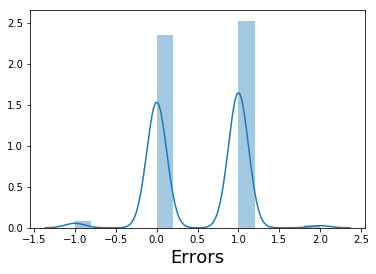

In [177]:
sns.distplot((y_train.astype('int') - y_train_pred.astype('int')), bins = 15)
plt.xlabel('Errors', fontsize = 18)    

### Making predictions on test data

In [178]:
x_test = x_test[rfe_x_train.columns]

In [179]:
len(x_test.columns)

14

In [180]:
x_test_final = sm.add_constant(x_test)

In [181]:
y_pred_test = lr_model_3.predict(x_test_final)

### Model Evaluation

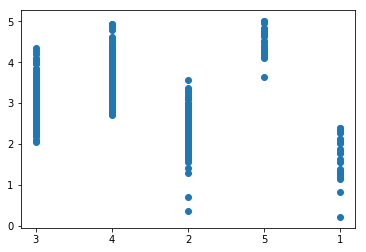

In [182]:
plt.scatter(y_test,y_pred_test)

# Part 3: Factor Analysis

In [183]:
!pip install eli5

In [185]:
import eli5

In [189]:
#eli5.show_weights(lr_model_3)

Text(0, 0.5, 'y_pred')

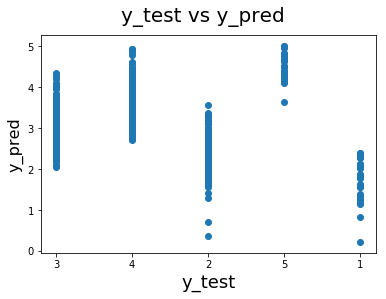

In [190]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [188]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_test)

0.6761977854105893

ValueError: x and y must be the same size

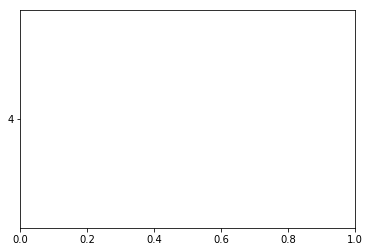

In [191]:
plt.scatter(rfe_x_train, y_train, color = "red")
plt.plot(rfe_x_train, y_train_pred, color = "green")

plt.show()

In [192]:
x_test.shape

(1095, 14)

In [193]:
y_test.shape

(1095,)

In [194]:
y_pred_test.shape

(1095,)

In [195]:
final_pred_df = pd.concat([x_test, y_test,y_pred_test], axis= 1)

In [196]:
final_pred_df.to_csv(path + 'final_pred_df.csv')

In [197]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [198]:
lr.fit(rfe_x_train, y_train.astype('float'))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [202]:
eli5.show_weights(lr, feature_names = list(rfe_x_train.columns))

Weight?,Feature
+3.107,<BIAS>
+0.119,H_COMP_3_LINEAR_SCORE_mean
+0.111,H_HSP_RATING_LINEAR_SCORE_mean
+0.090,H_COMP_7_LINEAR_SCORE_mean
+0.074,H_COMP_4_LINEAR_SCORE_mean
+0.054,H_COMP_5_LINEAR_SCORE_mean
+0.042,H_CLEAN_LINEAR_SCORE_mean
-0.026,READM_30_PN_score
-0.033,OP_10
-0.059,ED_1b_score


In [203]:
lr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Hospital_overall_rating   R-squared:                       0.722
Model:                                 OLS   Adj. R-squared:                  0.720
Method:                      Least Squares   F-statistic:                     470.2
Date:                     Wed, 25 Dec 2019   Prob (F-statistic):               0.00
Time:                             21:48:08   Log-Likelihood:                -1529.1
No. Observations:                     2553   AIC:                             3088.
Df Residuals:                         2538   BIC:                             3176.
Df Model:                               14                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              3.1065      0.010    320.273      0.000       3.088       3.126
MORT_30_COPD_score                -0.0838      0.010     -8.569      0.000      -0.103      -0.065
MORT_30_HF_score                  -0.1241      0.010    -12.176      0.000      -0.144      -0.104
MORT_30_PN_score                  -0.1395      0.010    -13.982      0.000      -0.159      -0.120
READM_30_HOSP_WIDE_score          -0.3605      0.011    -33.163      0.000      -0.382      -0.339
READM_30_PN_score                 -0.0265      0.011     -2.493      0.013      -0.047      -0.006
H_CLEAN_LINEAR_SCORE_mean          0.0419      0.013      3.270      0.001       0.017       0.067
H_COMP_3_LINEAR_SCORE_mean         0.1194      0.017      6.933      0.000       0.086       0.153
H_COMP_4_LINEAR_SCORE_mean         0.0737      0.016      4.590      0.000       0.042       0.105
H_COMP_5_LINEAR_SCORE_mean         0.0545      0.015      3.664      0.000       0.025       0.084
H_COMP_7_LINEAR_SCORE_mean         0.0895      0.018      5.093      0.000       0.055       0.124
H_HSP_RATING_LINEAR_SCORE_mean     0.1112      0.018      6.196      0.000       0.076       0.146
OP_10                             -0.0329      0.008     -4.106      0.000      -0.049      -0.017
ED_1b_score                       -0.0590      0.010     -6.037      0.000      -0.078      -0.040
government                        -0.0787      0.023     -3.412      0.001      -0.124      -0.033
==============================================================================
Omnibus:                       20.597   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.906
Skew:                          -0.169   Prob(JB):                     1.06e-05
Kurtosis:                       3.319   Cond. No.                         6.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""